## Test de la funcion "downsample" del modulo maf_IO.py

Este test necesita disponer de unos archivos "test_space.cvs" y "test_data.cvs" en el mismo directorio que este notebook, sobre los cuales hará la prueba.

In [1]:
import time
import numpy as np
import maf_IO as IO
from sys import stdout

Cargamos primero los datos de prueba, y de una vez cronometramos cuánto le toma.

In [2]:
# test data
stdout.write("\rloading time . . . ")
t0 = time.time()
data, space = IO.read(prefix="test")
t = time.time()-t0
stdout.write("\rloading time . . . {0} s".format(t))
stdout.flush()
print "\ndatasets: {0}\ttimes: {1}\ty's: {2},\tx's: {3}".format(*data.shape)

loading time . . . 13.1552970409 s
datasets: 6	times: 1001	y's: 31,	x's: 51


Ahora hacemos el muestreo y comparamos con lo que esperaríamos en un espacio continuo.

In [3]:
min_step = 0.00010 # distancia minima que vamos a permitir entre tiempos, en segundos
tol = 0.15 # tolerancia que vamos a permitir, en porcentaje del paso desado
# i.e. la funcion toma como bueno un paso "s" que caiga dentro de [(1-tol)*min_step,(1+tol)*min_step]
#####################################################################################################
print "Numero total de muestras:\t{}".format(len(space[0]))
print "Numero esperado de muestras:\t{}".format(int(space[0][-1]/min_step)+1)
stime = IO.downsample(space[0],min_sep=min_step,tol=tol)
print "Numero de muestras tomadas:\t{}".format(len(stime))

Numero total de muestras:	1001
Numero esperado de muestras:	260
Numero de muestras tomadas:	254


Escribimos el espacio muestreado, por si quieres ver largas listas de floats.

In [8]:
t0 = time.time()
a = IO.outwrite(space, data, samp_steps=[min_step, None, None], fprefix="samp-test", tol=tol)
t = time.time()-t0
stdout.write("\rwriting time: {0} s".format(t))
stdout.flush()

	. . . space file already exists
	. . . data file already exists, but space is unchanged; nothing written
writing time: 0.0130889415741 s

Ahora leamos el nuevo archivo, de la misma forma que antes, para verificar el cambio.

In [9]:
# sampled data
stdout.write("\rloading time . . . ")
t0 = time.time()
new_data, new_space = IO.read(prefix="samp-test")
t = time.time()-t0
stdout.write("\rloading time . . . {0} s".format(t))
stdout.flush()
print "\ndatasets: {0}\ttimes: {1}\ty's: {2},\tx's: {3}".format(*new_data.shape)

loading time . . . 3.27833485603 s
datasets: 6	times: 254	y's: 31,	x's: 51


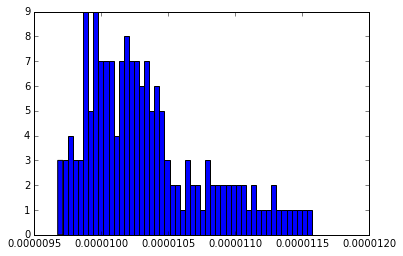

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
a = [0.000010333,1.04751524665629E-005,1.06364923597241E-005,1.07956547207445E-005,9.69773237030349E-006,9.77991147535172E-006,9.8747500051893E-006,9.97522532516265E-006,0.000010072,1.01902714450768E-005,1.02950533551036E-005,1.04115950024484E-005,1.05181984838864E-005,1.05948470836672E-005,1.06868122251667E-005,1.07676486597011E-005,1.08583726480567E-005,1.09518145783595E-005,1.10398272881627E-005,9.74735612860257E-006,9.81613539438169E-006,9.89405678169573E-006,9.97325420830584E-006,1.00453933778662E-005,0.000010133,1.01936428633419E-005,0.000010256,1.03192039934087E-005,1.03766767046688E-005,0.000010449,1.05084263502383E-005,1.05758383808697E-005,1.06443036131194E-005,1.07066209908955E-005,1.07841650523266E-005,1.08482362569836E-005,1.09203580869882E-005,1.099316534622E-005,1.1059326036503E-005,1.11405976452928E-005,1.12075996850933E-005,1.12798553128061E-005,9.71794915427147E-006,9.76085586273186E-006,9.80425666702068E-006,9.84811084399026E-006,0.000009899,9.9438679932877E-006,9.98913330585503E-006,1.00348082026342E-005,1.00809134751696E-005,1.01341616823601E-005,1.01811030799679E-005,1.02283090195443E-005,1.02758892763024E-005,1.03238338963043E-005,1.03788722042561E-005,1.04274310555401E-005,1.04762998801509E-005,1.05253210117703E-005,1.0574566701373E-005,1.06308212515109E-005,1.06803953511795E-005,0.00001073,1.07766913282742E-005,1.08188115366971E-005,1.08660857571464E-005,0.000010906,1.09455004666551E-005,0.000010985,1.10247016279869E-005,1.10708039081792E-005,1.11110741711873E-005,1.1151629477903E-005,1.11924577695368E-005,1.12335026033077E-005,1.12801954831974E-005,1.13206630397531E-005,1.13613110844501E-005,1.14021827837083E-005,1.14432478700466E-005,1.14903832665952E-005,1.15316306132768E-005,0.000011573,9.67461498443381E-006,9.7014167416234E-006,9.72829018339183E-006,9.75528958455129E-006,9.7816354996639E-006,9.80608874407612E-006,9.83041195692144E-006,9.85468543535139E-006,9.87464251294725E-006,9.88090681162317E-006,9.88586959410707E-006,9.89110525495421E-006,9.89660271875198E-006,9.90232630879314E-006,9.90830089469706E-006,9.91453476914994E-006,0.000009921,9.92774996127111E-006,9.93468627363868E-006,9.94186245772619E-006,9.94928230185592E-006,9.95693312894194E-006,9.96316199339329E-006,9.96854419132434E-006,9.97410702485821E-006,9.97978188735393E-006,9.9856506350555E-006,9.99173649059919E-006,0.000009998,1.00045522407886E-005,1.00112475508976E-005,1.00180714316426E-005,1.00250815185381E-005,1.00322564486476E-005,1.00395884281511E-005,1.00471136706714E-005,1.00548409600891E-005,1.00627685435974E-005,1.00708392832662E-005,0.000010079,1.00872906981309E-005,1.00957966573832E-005,1.01044960517107E-005,1.01133403393055E-005,1.01223333296896E-005,1.01314587912184E-005,1.01391284824221E-005,1.01461936632924E-005,1.01534871048445E-005,0.000010161,1.01687473064848E-005,1.01767083995306E-005,1.01848863782903E-005,1.01932785384787E-005,1.02018821400494E-005,1.02092467779179E-005,1.02153264295646E-005,1.02215704284566E-005,0.000010228,1.02345401761072E-005,1.02413371096135E-005,1.02483412000439E-005,1.02555504000886E-005,0.000010263,1.02705759546275E-005,1.02783882303021E-005,1.02863974586614E-005,1.02945725690914E-005,1.03029155740432E-005,1.03114500282174E-005,1.0320173908697E-005,1.03290851986633E-005,1.03381569224934E-005,1.03473824911912E-005,1.03567891504763E-005,1.03663757898172E-005,1.03761404193349E-005,1.0386081057434E-005,1.0396195731127E-005,1.04064824763505E-005,1.04169038938442E-005,1.04274069870896E-005,1.04380558201963E-005,1.04488704272599E-005,1.04598488725053E-005,0.000010471]
plt.hist(a, 50);